**Name:** Krish Thakkar  
**SAP:** 60009230213   
**Batch :** D2-2   
**Lab:** ML Lab 6

In [ ]:
print("Logistic regression")

Logistic regression


In [ ]:
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy import log,dot,exp,shape

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

In [ ]:
def standardize(X_tr):
  for i in range(shape(X_tr)[1]):
    X_tr[:,1] = (X_tr[:,1] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

In [ ]:
class LogisticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
standardize(X_tr)
standardize(X_te)
obj1 = LogisticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

<ipython-input-6-7786f3ec9bf0>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


In [ ]:
def f1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [ ]:
f1_score_tr = f1_score(y_tr,y_train)
f1_score_te = f1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.8666666666666667
0.8000000000000002


In [ ]:
# Using library

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model1=LogisticRegression().fit(X_tr,y_tr)
y_pred=model1.predict(X_te)
y_pred_train=model1.predict(X_tr)
print("Testing F1 Score: ",f1_score(y_te,y_pred))
print("Training F1 Score: ",f1_score(y_tr,y_pred_train))

Testing F1 Score:  0.8000000000000002
Training F1 Score:  0.8666666666666667


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score

y_train_pred = logreg.predict(X_train_std)
y_test_pred = logreg.predict(X_test_std)
f1_train = f1_score(y_train, y_train_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')
print("F1 Score")
print("Training Set:", f1_train)
print("Testing Set:", f1_test)

F1 Score
Training Set: 0.9714687562788829
Testing Set: 0.975983436853002


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = logreg.predict(X_train_std)
y_test_pred = logreg.predict(X_test_std)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy : ")
print("Training Set:", accuracy_train)
print("Testing Set:", accuracy_test)

Accuracy : 
Training Set: 0.9714285714285714
Testing Set: 0.9777777777777777


In [ ]:
# Regularisation

In [ ]:
X = iris.data[:,[2,3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

weights, params = [], []
for c in np.arange(0, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

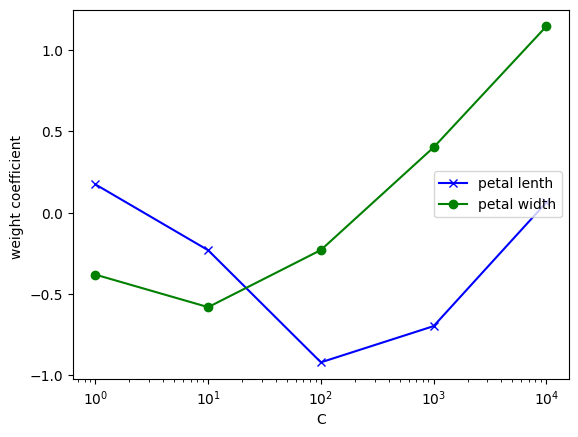

In [ ]:
import matplotlib.pyplot as plt

plt.plot(params,weights[:,0],color="blue",marker="x",label="petal lenth")
plt.plot(params,weights[:,1],color="green",marker="o",label="petal width")
plt.ylabel('weight coefficient ')
plt.xlabel('C')
plt.legend(loc="right")
plt.xscale("log")
plt.show()

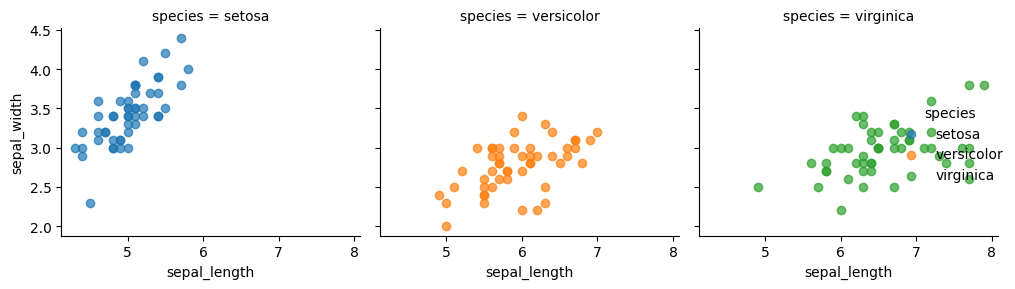

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

g = sns.FacetGrid(iris, col="species", hue="species", col_wrap=3)
g.map(plt.scatter, "sepal_length", "sepal_width", alpha=0.7)

g.add_legend()
plt.tight_layout()
plt.show()

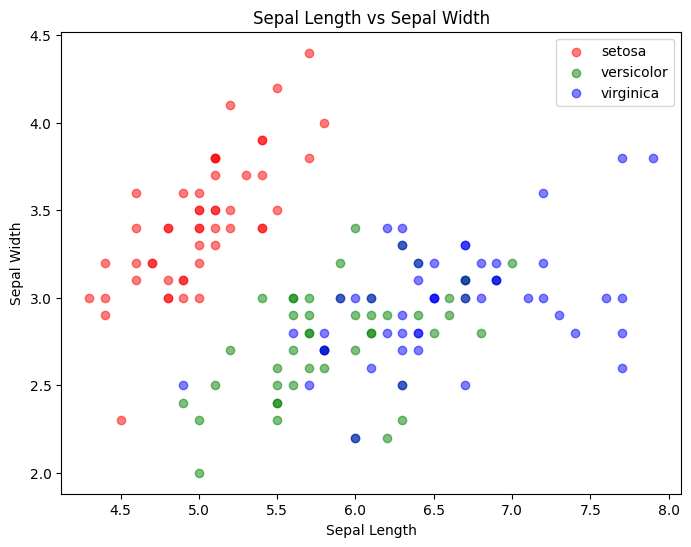

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))

for species, color in zip(iris['species'].unique(), ['r', 'g', 'b']):
    species_data = iris[iris['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species, color=color, alpha=0.5)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

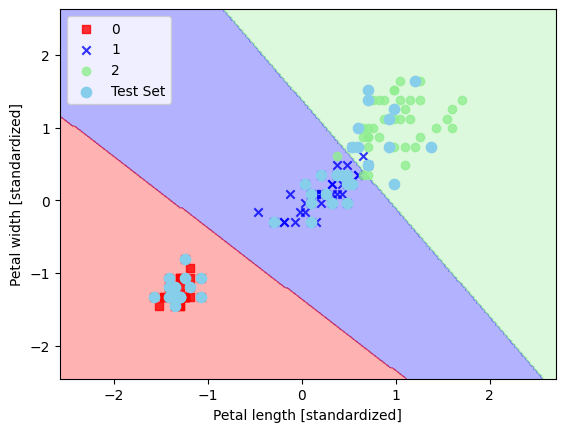

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='skyblue',
                    alpha=1.0, linewidths=1, marker='o', s=55, label='Test Set')

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X=np.vstack((X_train_std, X_test_std)),
                      y=np.hstack((y_train, y_test)),
                      classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.show()
